In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import datetime
from pylab import *
from scipy.cluster.vq import *

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
dateparse = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

In [4]:
df = pd.read_csv('/Users/linhongyi/Documents/911.csv',
                 header=0,names=['lat', 'lng','desc','zip','title','timeStamp','twp','addr','e'],
    dtype={'lat':float,'lng':float,'desc':str,'zip':str,
                  'title':str,'timeStamp':str,'twp':str,'addr':str,'e':int}, 
     parse_dates=['timeStamp'],date_parser=dateparse)
df.index = pd.DatetimeIndex(df.timeStamp)
df=df[(df.timeStamp >= "2016-01-01 00:00:00")]

In [4]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
timeStamp,,,,,,,,,
2016-01-01 00:10:08,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1
2016-01-01 00:14:45,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1
2016-01-01 00:20:43,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1
2016-01-01 00:25:30,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1
2016-01-01 00:30:28,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1


In [5]:
df['Category'] = df['title'].apply(lambda x: x.split(':')[0])
df['Sub-Category'] = df['title'].apply(lambda x: ''.join(x.split(':')[1]))

In [6]:
df['Category'].value_counts()

EMS        98725
Traffic    69481
Fire       29458
Name: Category, dtype: int64

In [7]:
df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    45959
Traffic: DISABLED VEHICLE -    14351
Fire: FIRE ALARM               11027
EMS: RESPIRATORY EMERGENCY     10290
EMS: FALL VICTIM                9948
Name: title, dtype: int64

In [8]:
df['twp'].nunique()

68

In [9]:
df[df['Category'] == 'Traffic']['twp'].value_counts().head(10)

LOWER MERION      7525
UPPER MERION      4935
ABINGTON          4017
CHELTENHAM        3572
PLYMOUTH          2775
UPPER DUBLIN      2546
UPPER MORELAND    2494
MONTGOMERY        2433
HORSHAM           2429
NORRISTOWN        2386
Name: twp, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

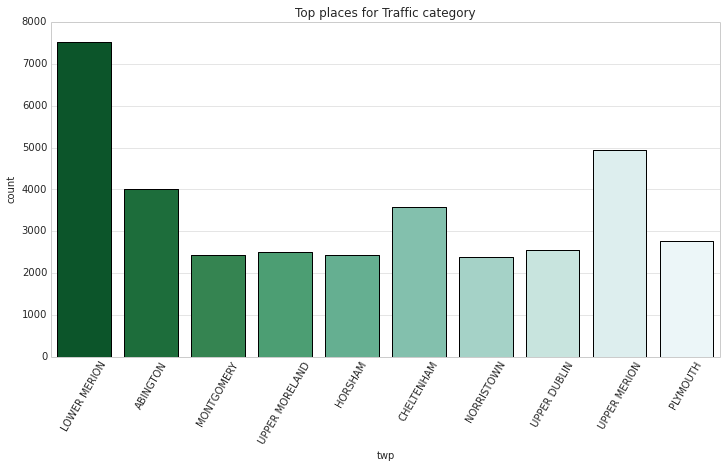

In [10]:
plt.figure(figsize = (12,6))
plt.title('Top places for Traffic category')
sns.countplot('twp', data = df[(df['Category'] == 'Traffic') 
                                    & (df['twp'].isin(['LOWER MERION', 'UPPER MERION', 'ABINGTON', 
                                                            'CHELTENHAM', 'PLYMOUTH', 'UPPER DUBLIN', 
                                                            'UPPER MORELAND', 
                                                            'HORSHAM', 'MONTGOMERY', 'NORRISTOWN']))], 
              palette = 'BuGn_r')
plt.xticks(rotation = 60)

In [11]:
c=df[(df.title == 'Traffic: VEHICLE ACCIDENT -') & (df.twp == 'LOWER MERION')]
c.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Category,Sub-Category
timeStamp,,,,,,,,,,,
2016-01-01 15:40:13,40.017584,-75.303090,W MONTGOMERY AVE & BOOTH LN; LOWER MERION; 201...,19041,Traffic: VEHICLE ACCIDENT -,2016-01-01 15:40:13,LOWER MERION,W MONTGOMERY AVE & BOOTH LN,1,Traffic,VEHICLE ACCIDENT -
2016-01-02 06:28:00,40.026899,-75.234430,PRICE ST & FAIRVIEW AVE; LOWER MERION; 2016-01...,19004,Traffic: VEHICLE ACCIDENT -,2016-01-02 06:28:00,LOWER MERION,PRICE ST & FAIRVIEW AVE,1,Traffic,VEHICLE ACCIDENT -
2016-01-02 13:22:11,40.004556,-75.284357,LANCASTER AVE & CHATHAM RD; LOWER MERION; 2016...,19003,Traffic: VEHICLE ACCIDENT -,2016-01-02 13:22:11,LOWER MERION,LANCASTER AVE & CHATHAM RD,1,Traffic,VEHICLE ACCIDENT -
2016-01-02 14:35:20,40.015471,-75.305895,W LANCASTER AVE & BUCK LN; LOWER MERION; 2016-...,19041,Traffic: VEHICLE ACCIDENT -,2016-01-02 14:35:20,LOWER MERION,W LANCASTER AVE & BUCK LN,1,Traffic,VEHICLE ACCIDENT -
2016-01-02 16:47:50,40.024967,-75.282905,SCHUYLKILL EXPY & RIGHTERS FERRY RD UNDERPASS;...,NaN,Traffic: VEHICLE ACCIDENT -,2016-01-02 16:47:50,LOWER MERION,SCHUYLKILL EXPY & RIGHTERS FERRY RD UNDERPASS,1,Traffic,VEHICLE ACCIDENT -


In [12]:
p=pd.pivot_table(c, values='e', index=['timeStamp','lat','lng','twp'])
p.head()

/Library/Python/2.7/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'timeStamp' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


,,,,e
timeStamp,lat,lng,twp,
2016-01-01 15:40:13,40.017584,-75.303090,LOWER MERION,1
2016-01-02 06:28:00,40.026899,-75.234430,LOWER MERION,1
2016-01-02 13:22:11,40.004556,-75.284357,LOWER MERION,1
2016-01-02 14:35:20,40.015471,-75.305895,LOWER MERION,1
2016-01-02 16:47:50,40.024967,-75.282905,LOWER MERION,1


In [13]:
loandata = c.set_index('timeStamp')
Latitude=loandata['2016'].lat
Longitude=loandata['2016'].lng

In [14]:
Lat=c.lat
Lat.head()

timeStamp
2016-01-01 15:40:13    40.017584
2016-01-02 06:28:00    40.026899
2016-01-02 13:22:11    40.004556
2016-01-02 14:35:20    40.015471
2016-01-02 16:47:50    40.024967
Name: lat, dtype: float64

In [15]:
Long=c.lng
Long.head()

timeStamp
2016-01-01 15:40:13   -75.303090
2016-01-02 06:28:00   -75.234430
2016-01-02 13:22:11   -75.284357
2016-01-02 14:35:20   -75.305895
2016-01-02 16:47:50   -75.282905
Name: lng, dtype: float64

NameError: name 'Longtitude' is not defined

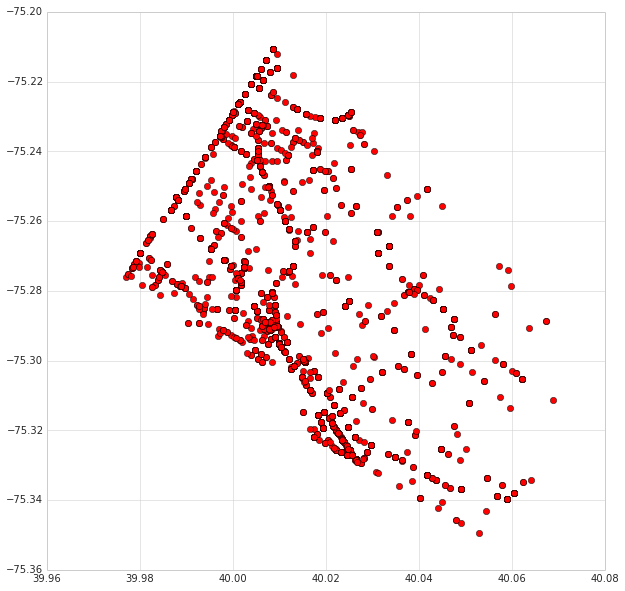

In [16]:
fig = plt.figure(figsize=(10,10))
plt.plot(Latitude,Longitude, 'ro')
original_data = transpose(vstack((transpose(Longtitude),transpose(Latitude))))
print original_data

In [101]:
class1 = Longitude
class2 = Latitude
features = transpose(vstack((class1,class2)))
print features

[[-75.3030897  40.0175836]
 [-75.2344303  40.0268992]
 [-75.2843574  40.0045557]
 ..., 
 [-75.2829046  40.0249667]
 [-75.2769563  40.0015036]
 [-75.278697   40.05979  ]]


In [17]:
centroids, variance = kmeans(features, 2)
code, distance = vq(features, centroids)
fig = plt.figure(figsize=(10,10))
ndx = where(code==0)[0]
plt.title('K-means k=2')
plot(features[ndx,1], features[ndx,0],'+')
print(features[ndx,1], features[ndx,0],'+')
ndx = where(code==1)[0]
plot(features[ndx, 1],features[ndx,0], 'r.')
plot(centroids[:, 1],centroids[:, 0], 'g*')

axis('on')
show()

NameError: name 'features' is not defined

[ 40.03089409  40.01379396  40.00513451] [-75.32008292 -75.28149707 -75.23377827]


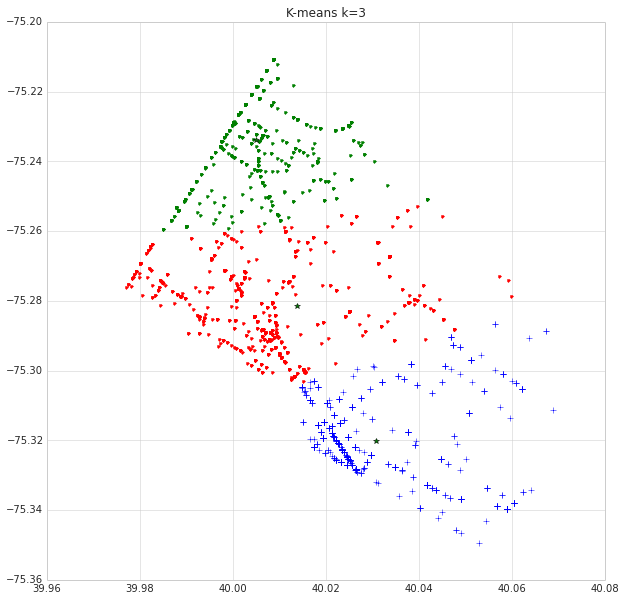

In [52]:
centroids, variance = kmeans(features, 3)
code, distance = vq(features, centroids)
fig = plt.figure(figsize=(10,10))
plt.title('K-means k=3')
ndx = where(code==0)[0]
plot(features[ndx,1], features[ndx,0],'+')
ndx = where(code==1)[0]
plot(features[ndx, 1],features[ndx,0], 'r.')
ndx = where(code==2)[0]
plot(features[ndx, 1],features[ndx,0], '.')
plot(centroids[:, 1],centroids[:, 0], 'g*')
print centroids[:, 1],centroids[:, 0]
axis('on')
show()

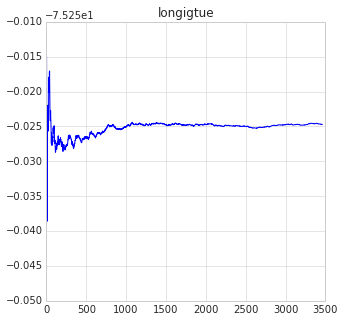

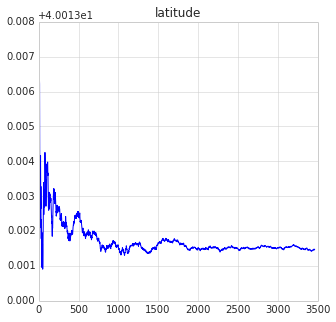

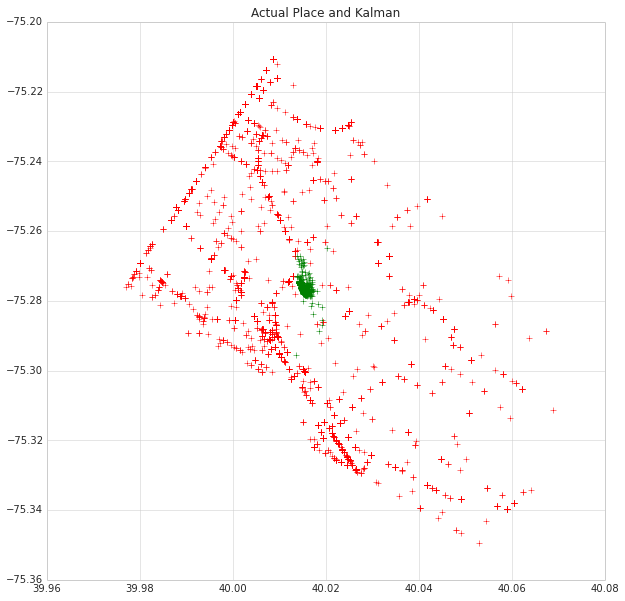

In [19]:
def kalman_xy(x, P, measurement, R,
              motion = np.matrix('0. 0. 0. 0.').T,
              Q = np.matrix(np.eye(4))*0):
    """
    Parameters:    
    x: initial state 4-tuple of location and velocity: (x0, x1, x0_dot, x1_dot)
    P: initial uncertainty convariance matrix
    measurement: observed position
    R: measurement noise 
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    """
    return kalman(x, P, measurement, R, motion, Q,
                  F = np.matrix('''
                  
                      1. 0. 0. 0. ;
                      0. 1. 0. 0. ; 
                      0. 0. 0. 0. ;
                      0. 0. 0. 0. '''),
                  H = np.matrix('''
                      1. 0. 0. 0.;
                      0. 1. 0. 0.'''))

def kalman(x, P, measurement, R, motion, Q, F, H):
    '''
    Parameters:
    x: initial state
    P: initial uncertainty convariance matrix
    measurement: observed position (same shape as H*x)
    R: measurement noise (same shape as H)
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    F: next state function: x_prime = F*x
    H: measurement function: position = H*x

    Return: the updated and predicted new values for (x, P)

    See also http://en.wikipedia.org/wiki/Kalman_filter

    This version of kalman can be applied to many different situations by
    appropriately defining F and H 
    '''
    # UPDATE x, P based on measurement m    
    # distance between measured and current position-belief
    y = np.matrix(measurement).T - H * x
    S = H * P * H.T + R  # residual convariance
    K = P * H.T * S.I    # Kalman gain
    x = x + K*y
    I = np.matrix(np.eye(F.shape[0])) # identity matrix
    P = (I - K*H)*P

    # PREDICT x, P based on motion
    x = F*x + motion
    P = F*P*F.T + Q

    return x, P

def demo_kalman_xy():
    x = np.matrix('0. 0. 0. 0.').T 
    P = np.matrix(np.eye(4))*1 # initial uncertainty
    
    true_x = Longitude
    true_y = Latitude
    #observed_x = true_x + 0.01*np.random.normal(0,0.001,3463)*true_x
    #observed_y = true_y + 0.01*np.random.normal(0,0.001,3463)*true_y
    observed_x = Longitude
    observed_y = Latitude
    result = []
    R = np.matrix('''
                  0.0001  0. ;
                  0.  0.0001 
                  ''')
    
    for meas in zip(observed_x, observed_y):
        x, P = kalman_xy(x, P, meas,R)
        result.append((x[:2]).tolist())
    kalman_x, kalman_y = zip(*result)
    fig = plt.figure(figsize=(5,5))
    plt.title('longigtue')
    plt.plot(kalman_x)
    fig = plt.figure(figsize=(5,5))
    plt.title('latitude')
    plt.plot(kalman_y)
    fig = plt.figure(figsize=(10,10))
    plt.title('Actual Place and Kalman')
    plt.plot(true_y,true_x,'r+')
    plt.plot(kalman_y,kalman_x, 'g+')
    plt.show()
    return kalman_x, kalman_y
class_kalman_1, class_kalman_2 = demo_kalman_xy()

[[-75.29556014  40.01358224]
 [-75.26499675  40.02024039]
 [-75.27145008  40.01501233]
 ..., 
 [-75.27469799  40.01447199]
 [-75.27469864  40.01446825]
 [-75.2746998   40.01448134]]


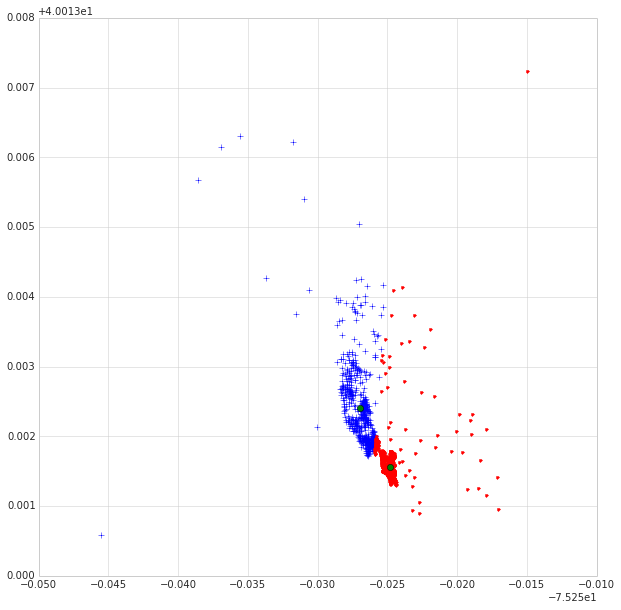

[ 40.01540667  40.01455933]


In [144]:
features = transpose(vstack((transpose(class_kalman_1),transpose(class_kalman_2))))
print features
centroids, variance = kmeans(features, 2)
code, distance = vq(features, centroids)
fig = plt.figure(figsize=(10,10))
ndx = where(code==0)[0]
plt.plot(features[ndx,0], features[ndx,1],'+')
ndx = where(code==1)[0]
plt.plot(features[ndx, 0],features[ndx,1], 'r.')
plt.plot(centroids[:, 0],centroids[:, 1], 'go')
axis('on')
show()
print centroids[:, 1]

In [37]:
from numpy.random import uniform, randn, random, seed
from filterpy.monte_carlo import multinomial_resample
import scipy.stats
seed(7)

def create_particles(x_range, y_range, v_mean, v_std, N):

    particles = np.empty((N, 4))
    particles[:, 0] = uniform(x_range[0], x_range[1], size=N)
    particles[:, 1] = uniform(y_range[0], y_range[1], size=N)
    particles[:, 2] = uniform(0, 2 * np.pi, size=N)
    particles[:, 3] = v_mean + (randn(N) * v_std)
    return particles

def predict_particles(particles, std_heading, std_v, x_range, y_range):

    idx = np.array([True] * len(particles))
    particles_last = np.copy(particles)
    for i in range(100): 
        if i == 0:
            particles[idx, 2] = particles_last[idx, 2] + (randn(np.sum(idx)) * std_heading)
        else:
            particles[idx, 2] = uniform(0, 2 * np.pi, size=np.sum(idx)) 
        particles[idx, 3] = particles_last[idx, 3] + (randn(np.sum(idx)) * std_v)
        particles[idx, 0] = particles_last[idx, 0] + np.cos(particles[idx, 2] ) * particles[idx, 3]
        particles[idx, 1] = particles_last[idx, 1] + np.sin(particles[idx, 2] ) * particles[idx, 3]
        
        idx = ((particles[:, 0] < x_range[0])
                | (particles[:, 0] > x_range[1])
                | (particles[:, 1] < y_range[0]) 
                | (particles[:, 1] > y_range[1]))
        if np.sum(idx) == 0:
            break
            
def update_particles(particles, weights, z, d_std):
    
    # weights.fill(1.)
    distances = np.linalg.norm(particles[:, 0:2] - z, axis=1)
    weights *= scipy.stats.norm(0, d_std).pdf(distances)
    weights += 1.e-300
    weights /= sum(weights)

def estimate(particles, weights):
    
    return np.average(particles, weights=weights, axis=0)

def neff(weights):
    
    return 1. / np.sum(np.square(weights))

def resample_from_index(particles, weights, indexes):
    
    particles[:] = particles[indexes]
    weights[:] = weights[indexes]
    weights /= np.sum(weights)
    
def run_pf(particles, weights, z, x_range, y_range):
    
    x_range, y_range = [0, 20], [0, 15]
    predict_particles(particles, 0.5, 0.01, x_range, y_range)
    update_particles(particles, weights, z, 4) 
    if neff(weights) < len(particles) / 2: 
        indexes = multinomial_resample(weights)
        resample_from_index(particles, weights, indexes)
    return estimate(particles, weights)

In [38]:
knn_predictions = features
knn_pf_predictions = np.empty(knn_predictions.shape)
x_range, y_range = [-75.277, -75.275 ], [40.014, 40.015]
n_particles = 500
particles = create_particles(x_range, y_range, 0, 0, n_particles)
weights = np.ones(n_particles) / n_particles 

for i, pos in enumerate(knn_predictions):
    pos = pos.copy()/100. 
    state = run_pf(particles, weights, pos, x_range, y_range)
    knn_pf_predictions[i, :] = state[0:2]

In [18]:
print features

NameError: name 'features' is not defined

In [40]:
print knn_pf_predictions

[[-75.27578906  40.01469274]
 [-75.27525853  40.01480995]
 [-75.27426657  40.01458481]
 ..., 
 [ -0.7480988    0.42262839]
 [ -0.74865319   0.42193891]
 [ -0.75119835   0.42325423]]


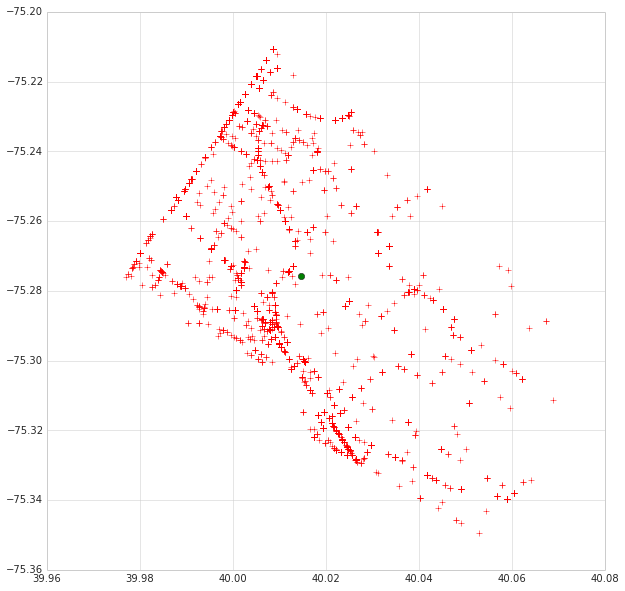

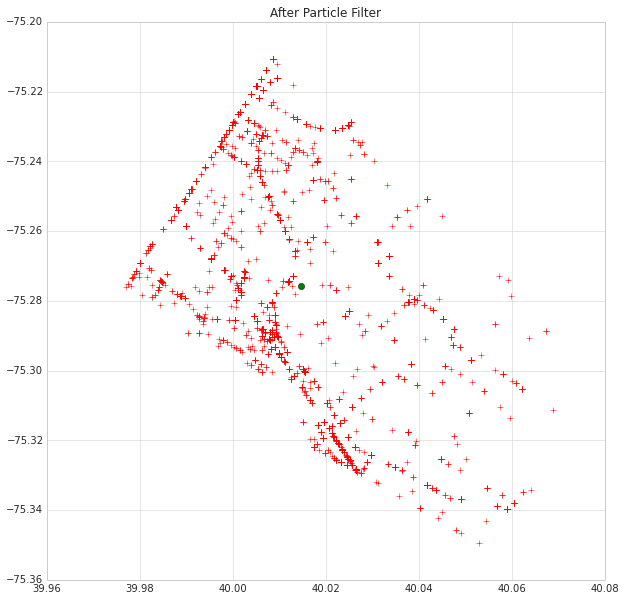

In [43]:
fig = plt.figure(figsize=(10,10))
plt.plot(features[:,1],features[:,0],'r+')
plt.plot(knn_pf_predictions[0,1],knn_pf_predictions[0,0],'go')
plt.show()
fig = plt.figure(figsize=(10,10))
plt.title('After Particle Filter')
plt.plot(Latitude,Longitude, 'r+')
plt.plot(knn_pf_predictions[0,1],knn_pf_predictions[0,0],'go')
plt.show()